### **Análise dos dados**

Segue abaixo a análise dos dados inicialmente fornecidos.

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas.io.parquet import to_parquet

from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

Inicializando os dados

In [9]:
#Convertendo tabelas de excel para csv

df_resultados = pd.read_excel('../data/RESULTADOS_04_06_2024.xlsx',skiprows=1, usecols='B:I')
#df_resultados.to_csv('../data/RESULTADOS_04_06_2024.csv', index=False)

df_resultados2 = pd.read_excel('../data/RESULTADOS_02_03_2024.xlsx',skiprows=1, usecols='B:I')
#df_resultados2.to_csv('../data/RESULTADOS_02_03_2024.csv', index=False)

df_resultados3 = pd.read_excel('../data/RESULTADOS_06_2023_07_2023.xlsx',skiprows=1, usecols='B:I')
#df_resultados3.to_csv('../data/RESULTADOS_06_2023_07_2023.csv', index=False)

df_falhas = pd.read_excel('../data/FALHAS_04_05_06_2024.xlsx',skiprows=1, usecols='B:J')
df_falhas.to_csv('../data/FALHAS_04_05_06_2024.csv', index=False)


/home/bielle/Documents/GitHub/2024-2A-T08-EC07-G01/.venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
#instanciando os df's

df_resultados = pd.read_csv('../data/RESULTADOS_04_06_2024_full_teste.csv', compression='gzip')
df_resultados2 = pd.read_csv('../data/RESULTADOS_02_03_2024_full_teste.csv', compression='gzip')
df_resultados3 = pd.read_csv('../data/RESULTADOS_06_2023_07_2023_full_teste.csv' ,compression='gzip')
df_falhas = pd.read_csv('../data/FALHAS_04_05_06_2024.csv')
#df_atualizado = pd.read_csv('../data/Tabela_Falhas_Atualizada.csv')

Checando os dados (no caso de estar usando a planilha excel)

In [ ]:
# Remover coluna errada
df_resultados = df_resultados.drop(columns=['Unnamed: 0'], axis=1)
df_resultados2 = df_resultados2.drop(columns=['Unnamed: 0'], axis=1)
df_resultados3 = df_resultados3.drop(columns=['Unnamed: 0'], axis=1)
df_falhas = df_falhas.drop(columns=['Unnamed: 0'], axis=1)



Arrumando os dados de falha pois o nome da coluna ficou nas primeiras linhas (no caso de estar usando a planilha em excel)

In [5]:
df_falhas.columns = df_falhas.iloc[0]

df_falhas = df_falhas.drop(df_falhas.index[0])

Checar DFs

In [12]:
df_falhas.head()

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
0,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PARALAMA DIANTEIRO 01. AMASSADO,2024-05-20 21:31:51.992
1,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PORTA TRASEIRA 04. CAROÇO / PICO,2024-05-20 21:30:22.772
2,2023-2056234,T-CROSS,2R2R,DHS,PCEQS620,2058570,ZP6,MÓDULO DO ACC (13) PEÇA INCORRETA ¨,2024-05-20 20:04:55.534
3,2023-2056234,T-CROSS,2R2R,DHS,PCEQS999,2087715,ESPC,TAMPA TRASEIRA 05. SUJEIRA NA PINTURA,2024-04-11 12:15:39.616
4,2023-3896001,T-CROSS,0Q0Q,,HCEQS203,2043971,ZP5A,TAMPA DIANTEIRA 05. SUJEIRA NA PINTURA,2024-06-05 17:38:51.565


Analisando os tipos de dados de falhas

In [13]:
df_falhas.describe()

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
count,328901,328901,328901,328901,328891,328891,328106,328901,328901
unique,23972,1,11,5,61,366,27,4778,171140
top,2024-1746005,T-CROSS,K2K2,DHS,HCEQS506,FHQWRAP,ZP7,PAINEL LATERAL 05. SUJEIRA NA PINTURA,2024-06-07 18:40:44.000
freq,94,328901,86931,194962,153670,19299,86585,13146,6


In [14]:
df_resultados.head(20)

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
0,2023-2056234,012001,1,10,NaN,NaN,NaN,2024-05-16 13:41:25.000
1,2023-2056234,012002,1,10,NaN,NaN,NaN,2024-05-16 14:12:35.000
2,2023-2056234,012003,1,10,NaN,NaN,NaN,2024-05-16 14:12:27.000
3,2023-2056234,012004,1,10,NaN,NaN,NaN,2024-05-16 14:11:07.000
4,2023-2056234,012008,1,10,NaN,NaN,NaN,2024-05-16 14:13:07.000
5,2023-2056234,018001,1,10,NaN,NaN,NaN,2024-05-16 14:02:19.000
6,2023-2056234,042000,1,10,Deg,5.0,15601 ...,2024-05-16 13:21:03.000
7,2023-2056234,042000,1,10,mm,3.0,1.69 ...,2024-05-16 13:21:03.000
8,2023-2056234,042000,1,10,mm,2.0,1.98 ...,2024-05-16 13:21:03.000
9,2023-2056234,042000,1,10,mm,1.0,3.67 ...,2024-05-16 13:21:03.000


### Análise de Dados para Modelo de Falhas em Veículos

Após a análise dos dados, foram feitas as seguintes seleções para o treinamento e teste do modelo:

#### Falhas
- **Colunas a serem utilizadas:**
  - `KNR`: Identificação do veículo.
  - `FALHA`: Indicação da ocorrência da falha.
- **Motivo:** As demais colunas são únicas para os veículos que tiveram falhas e não estão presentes na tabela de `RESULTADOS`. Incluir essas colunas poderia causar viés no modelo.

#### Resultados
- **Colunas a serem descartadas:**
  - `UNIT`
  - `VALUE_ID`
  - `VALUE`
- **Motivo:** Essas colunas não serão utilizadas na análise inicial, mas podem ser incluídas futuramente para melhorar a acurácia e o recall do modelo.

#### Observações Futuras
- **Coluna `Data` da tabela FALHAS:** Pode ser explorada futuramente para criar novas features.

Essa abordagem foi adotada para garantir que o modelo seja treinado e testado com dados que não introduzam viés, permitindo uma análise mais objetiva e confiável.


## Preparação dos dados

Inicialmente, os dados serão integrados em uma única tabela

In [3]:
# Remoção das linhas com NaN

df_falhas = df_falhas.dropna()
df_resultados = df_resultados.dropna()
df_resultados2 = df_resultados2.dropna()
df_resultados3 = df_resultados3.dropna()

In [11]:
df_resultados.head()

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
6,2023-2056234,042000,1,10,Deg,5.0,15601 ...,2024-05-16 13:21:03.000
7,2023-2056234,042000,1,10,mm,3.0,1.69 ...,2024-05-16 13:21:03.000
8,2023-2056234,042000,1,10,mm,2.0,1.98 ...,2024-05-16 13:21:03.000
9,2023-2056234,042000,1,10,mm,1.0,3.67 ...,2024-05-16 13:21:03.000
10,2023-2056234,042000,1,10,Nm,4.0,2.93 ...,2024-05-16 13:21:03.000


Convertendo a coluna DATA para um formato melhor

In [17]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790967 entries, 6 to 1048572
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   KNR       790967 non-null  object 
 1   NAME      790967 non-null  object 
 2   ID        790967 non-null  int64  
 3   STATUS    790967 non-null  int64  
 4   UNIT      790967 non-null  object 
 5   VALUE_ID  790967 non-null  float64
 6   VALUE     790967 non-null  object 
 7   DATA      790967 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 54.3+ MB


In [4]:
# Salvando os dados em "parquet" é mais rápido para leitura

df_resultados.to_parquet('../data/df_resultados.parquet', index=False)
df_resultados2.to_parquet('../data/df_resultados2.parquet', index=False)
df_resultados3.to_parquet('../data/df_resultados3.parquet', index=False)

In [13]:
# Limpando colunas que não serão usadas agora (Tentativa de manipulação dessas colunas no notebook "modelo1_com_torques.ipynb")

colunas = ['UNIT', 'VALUE_ID', 'VALUE']

df_resultados2 = df_resultados2.drop(columns=colunas, axis=1)
df_resultados = df_resultados.drop(columns=colunas, axis=1)
df_resultados3 = df_resultados3.drop(columns=colunas, axis=1)

In [5]:
# Transformando os DFs de resultados em apenas um DF de resultados maior

df = pd.concat([df_resultados, df_resultados2, df_resultados3])

#Exportando o df concatenado para csv
df.to_csv('../data/df_resultados_full.csv', index=False)

In [15]:
# Transformando data em datetime do pandas

df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

Segue abaixo o código para a preparação dos dados

In [16]:
def aggregate_by_id(df, id_value):
    subset = df[df['ID'] == id_value]
    return subset.groupby('KNR').agg(
        NAME=('NAME', 'count'),  # Conta total de NAME
        SOK=('STATUS', lambda x: (x == 10).sum()),
        SNOK=('STATUS', lambda x: (x == 13).sum()),
        DATA=('DATA', lambda x: (x.max() - x.min()).total_seconds() / (3600*24))
    ).rename(columns={
        'NAME': f'ID{id_value}NAME',
        'SOK': f'ID{id_value}SOK',
        'SNOK': f'ID{id_value}SNOK',
        'DATA': f'ID{id_value}DATA'
    })

# Agregando para cada ID
id1 = aggregate_by_id(df, 1)
id2 = aggregate_by_id(df, 2)
id718 = aggregate_by_id(df, 718)

# Combinando os resultados em um único DataFrame
final_df = id1.join(id2, on='KNR', how='outer').join(id718, on='KNR', how='outer').reset_index()

# Reordenando as colunas para o formato desejado
final_df = final_df[['KNR','ID1NAME', 'ID1SOK', 'ID1SNOK', 'ID1DATA', 'ID2NAME', 'ID2SOK', 'ID2SNOK', 'ID2DATA', 'ID718NAME', 'ID718SOK', 'ID718SNOK', 'ID718DATA']]

# Exibindo o resultado
print(final_df)

                KNR  ID1NAME  ID1SOK  ID1SNOK  ID1DATA  ID2NAME  ID2SOK  \
0      2023-2016173      NaN     NaN      NaN      NaN     12.0    12.0   
1      2023-2026098      NaN     NaN      NaN      NaN      8.0     8.0   
2      2023-2026162      NaN     NaN      NaN      NaN      8.0     8.0   
3      2023-2026175      NaN     NaN      NaN      NaN      8.0     8.0   
4      2023-2026215      NaN     NaN      NaN      NaN      8.0     8.0   
...             ...      ...     ...      ...      ...      ...     ...   
49186  2024-2976009      NaN     NaN      NaN      NaN     72.0    72.0   
49187  2024-2976010      NaN     NaN      NaN      NaN     72.0    72.0   
49188  2024-2976011      NaN     NaN      NaN      NaN     74.0    74.0   
49189  2024-2976012      NaN     NaN      NaN      NaN     82.0    82.0   
49190  2024-2976013      NaN     NaN      NaN      NaN     72.0    72.0   

       ID2SNOK   ID2DATA  ID718NAME  ID718SOK  ID718SNOK  ID718DATA  
0          0.0  0.000231     

In [17]:
# Colocar 0 no lugar de NaN para evitar problemas
final_df = final_df.fillna(0)

In [19]:
#Exportando o df final para csv
final_df.to_csv('../data/df_resultados_tratado.csv', index=False)

In [20]:
final_df.head(10)

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA
0,2023-2016173,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.000231,2.0,1.0,1.0,0.00331
1,2023-2026098,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000012,1.0,1.0,0.0,0.00000
2,2023-2026162,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000058,1.0,1.0,0.0,0.00000
3,2023-2026175,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000069,1.0,1.0,0.0,0.00000
4,2023-2026215,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000058,1.0,1.0,0.0,0.00000
5,2023-2026304,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.000694,1.0,1.0,0.0,0.00000
6,2023-2026353,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.000035,1.0,1.0,0.0,0.00000
7,2023-2026405,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000150,1.0,1.0,0.0,0.00000
8,2023-2026414,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.000544,1.0,1.0,0.0,0.00000
9,2023-2036003,0.0,0.0,0.0,0.0,10.0,10.0,0.0,16.120174,1.0,1.0,0.0,0.00000


In [21]:
# Checar o tamanho do DataFrame

final_df.shape

(49191, 13)

Arrumando o DF de Falhas


In [18]:
# Deixa todas as falhas em letra maiuscula
df_falhas['FALHA'] = df_falhas['FALHA'].str.upper()

In [19]:
# Checa o DataFrame
df_falhas.head()

df_falhas.to_csv('../data/Final_DF.csv', index=False)
df_final = pd.read_csv('../data/Final_DF.csv')

In [29]:
# Removendo as colunas que não serão utilizadas na predição

colunas_to_remove = ['MODELO', 'COR', 'MOTOR', 'ESTACAO', 'USUARIO', 'HALLE', 'DATA']

df_falhas = df_falhas.drop(columns=colunas_to_remove, axis=1)

In [30]:
# Remove todas as linhas com KNR repetido
df_falhas_unique = df_falhas.drop_duplicates(subset=['KNR'])

# Checa o DataFrame
df_falhas_unique.head()


,KNR,FALHA
0,2023-2056234,PARALAMA DIANTEIRO 01. AMASSADO
4,2023-3896001,TAMPA DIANTEIRA 05. SUJEIRA NA PINTURA
6,2023-4896002,TETO 05. SUJEIRA NA PINTURA
7,2024-0576008,FAROL (09) PEÇA NOK
9,2024-0576017,TAMPA TRASEIRA 05. SUJEIRA NA PINTURA


In [31]:
# Muda os valores da coluna de Falha para 1
df_falhas_unique['FALHA'] = 1

/tmp/ipykernel_17352/727693188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falhas_unique['FALHA'] = 1


In [32]:
# Checa o DataFrame
df_falhas_unique.head()

,KNR,FALHA
0,2023-2056234,1
4,2023-3896001,1
6,2023-4896002,1
7,2024-0576008,1
9,2024-0576017,1


Dando merge do Falhas com Resultado

In [33]:
# Realizando o merge dos dataframes df_falhas e final_df com base na coluna 'KNR'
merged_df = pd.merge(final_df, df_falhas_unique, on='KNR', how='left')

In [34]:
# Analisa o tamanho do DF final
merged_df.shape

(4577, 14)

In [35]:
# Adiciona 0 em todos os NaN
merged_df = merged_df.fillna(0)

In [7]:
merged_df.head()

# Exportando para csv
merged_df.to_csv('../data/merged_df.csv', index=False)

NameError: name 'merged_df' is not defined

Normalização e treinamento do modelo

In [37]:
# Selecionando apenas as colunas específicas para normalização
cols_to_normalize = ['ID1NAME','ID1SOK', 'ID1SNOK', 'ID1DATA', 'ID2NAME', 'ID2SOK', 'ID2SNOK', 'ID2DATA', 'ID718NAME', 'ID718SOK', 'ID718SNOK', 'ID718DATA']

# Inicializando o MinMaxScaler
scaler = MinMaxScaler()

# Aplicando a normalização
merged_df[cols_to_normalize] = scaler.fit_transform(merged_df[cols_to_normalize])

# Exibindo o dataframe normalizado
merged_df.head()

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2016173,0.0,0.0,0.0,0.0,0.013158,0.013245,0.0,0.0,0.005038,0.003546,0.004405,0.0,0.0
1,2023-2026098,0.0,0.0,0.0,0.0,0.008772,0.008830,0.0,0.0,0.002519,0.003546,0.000000,0.0,0.0
2,2023-2026162,0.0,0.0,0.0,0.0,0.008772,0.008830,0.0,0.0,0.002519,0.003546,0.000000,0.0,0.0
3,2023-2026175,0.0,0.0,0.0,0.0,0.008772,0.008830,0.0,0.0,0.002519,0.003546,0.000000,0.0,0.0
4,2023-2026215,0.0,0.0,0.0,0.0,0.008772,0.008830,0.0,0.0,0.002519,0.003546,0.000000,0.0,0.0


In [33]:
# Separando as features (X) e o target (y)
X = merged_df.drop(columns=['FALHA', 'KNR'])  # 'KNR' é apenas um identificador, então deve ser removido
y = merged_df['FALHA']

In [34]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Inicializando o classificador KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [36]:
# Performance no conjunto de treinamento
train_predictions = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Performance no conjunto de teste
test_predictions = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Acurácia no Treinamento:", train_accuracy)
print("Acurácia no Teste:", test_accuracy)

Acurácia no Treinamento: 0.8391149959027588
Acurácia no Teste: 0.8045851528384279


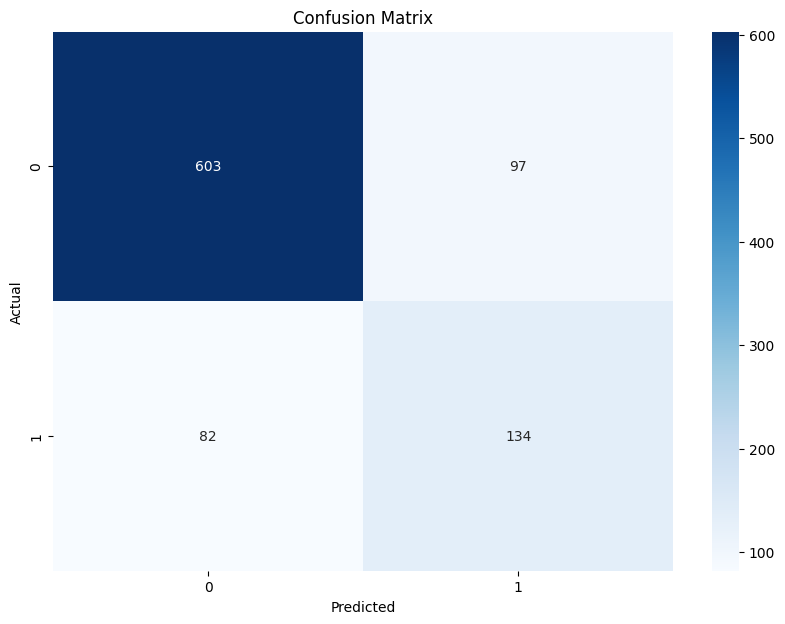

In [37]:
# Gerar a matriz
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plotar a matriz
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Analisa quantos valores são 1 e quantos 0 das falhas
print(y_train.value_counts())

FALHA
0.0    2740
1.0     921
Name: count, dtype: int64


## Análises pós chegada de novos dados

Nosso parceiro disponibilizou uma nova tabela de falhas (realizamos a exploração dela no arquivo *exploracao_falhas.ipynb*) e aqui começamos a comparar com a antiga tabela que tínhamos para avaliar se faz sentido atualizar esse modelo com essa nova tabela.

In [5]:
#Saber o tamanho da tabela antiga
df_falhas.shape

(328901, 9)

In [7]:
#Saber o tamanho da tabela nova
df_atualizado.shape

(757264, 10)

In [39]:
#Quantos KNRs da tabela nova estão também na antiga 

df_falhas['KNR'].isin(df_atualizado['KNR']).value_counts()

KNR
True     328100
False         6
Name: count, dtype: int64

A tabela atualizada possui os registros da "antiga" (com a exceção de 6), além de mais dados de quase o dobro de carros. Logo, por representar uma fatia maior de informação, é valido trocar o uso da tabela antiga pela nova.

In [ ]:
#Checando quantos KNRs da tabela utilizada pra treino também estão na tabela de falhas atualizada.

merged_df['KNR'].isin(df_atualizado['KNR']).value_counts()